# Assignment 2

In [113]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Question 1
A file Dog.jpg is provided with this assignment. Convert the RGB image to Greyscale image.

In [2]:
# Reading the image
image = cv2.imread('Dog.jpg')

In [4]:
image.shape

(3888, 5184, 3)

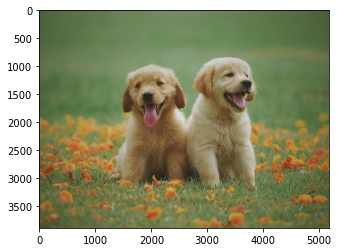

In [5]:
# show the image
plt.imshow(image[...,::-1])

In [18]:
# Using the formula Y = 0.299R + 0.587G + 0.114B
def rgb2gray(rgbImage):
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

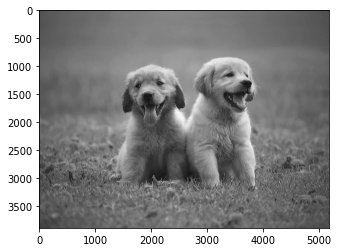

In [23]:
gray_img = rgb2gray(image)
plt.imshow(gray_img, cmap=plt.get_cmap('gray'))
plt.show()

In [25]:
gray_img.shape

(3888, 5184)

##### Question 2
Write code to perform SVD image compression with varying numbers of singular values andplot the reconstructed images. Explore how the image quality changes with different numbers of singularvalues. Take singular values(r) as 2, 5, 10, 25, 50, 100, 500.

In [35]:
# Function to perform SVD image compression
def svd_image_compression(image, r_values):
    U, s, Vt = np.linalg.svd(image, full_matrices=False)
    compressed_images = []
    for r in r_values:
        compressed_image = np.dot(U[:, :r], np.dot(np.diag(s[:r]), Vt[:r, :]))
        compressed_images.append(compressed_image)
        
    return compressed_images, U, s, Vt

In [36]:
# r values
r_values = [2, 5, 10, 25, 50, 100, 500]

# Compressing the image
compressed_images, U, s, Vt = svd_image_compression(gray_img, r_values)

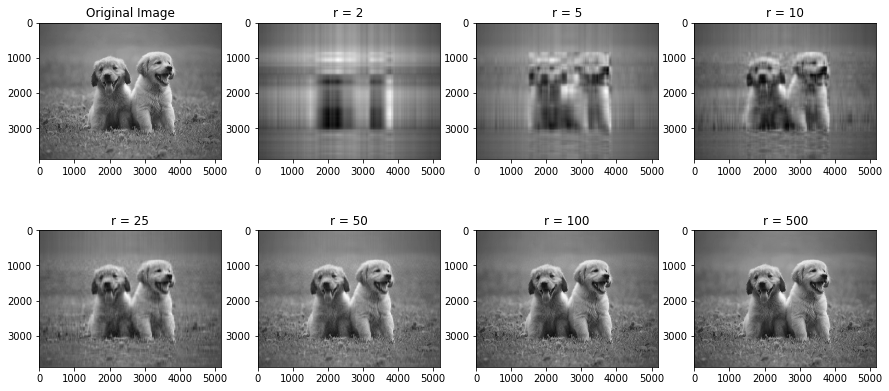

In [37]:
# Plotting the compressed images
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
ax = axes.ravel()
ax[0].imshow(gray_img, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original Image')
for i in range(1, 8):
    ax[i].imshow(compressed_images[i-1], cmap=plt.get_cmap('gray'))
    ax[i].set_title('r = %d' % r_values[i-1])
plt.show()


The image quality increases with the increase in the number of singular values.

##### Question 3
How does the memory space required for storage change with different values of ‘r’?

Memory space required for storage with different values of 'r': 
 [18146, 45365, 90730, 226825, 453650, 907300, 4536500]


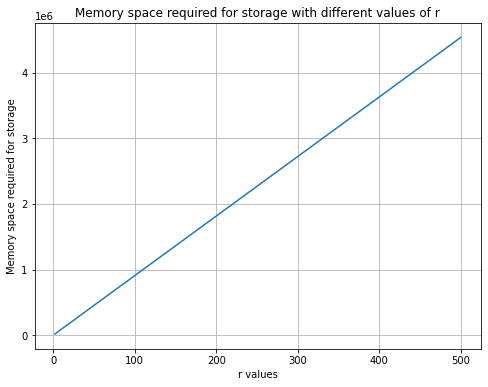

In [76]:
# Memory space required for storage
memory_space = [np.prod(U[:,:r].shape) + np.prod(s[:r].shape) + np.prod(Vt[:r,:].shape) for r in r_values]
print("Memory space required for storage with different values of 'r': \n", memory_space)

plt.figure(figsize=(8, 6))
plt.plot(r_values, memory_space)
plt.ylabel('Memory space required for storage')
plt.xlabel('r values')
plt.grid(True)
plt.title('Memory space required for storage with different values of r')
plt.show()

Memory space required for storage is directly proportional to the number of singular values. As the number of singular values increases, the memory space required for storage increases linearly.

##### Question 4
Plot cumulative distribution curve change with different values of singular values.

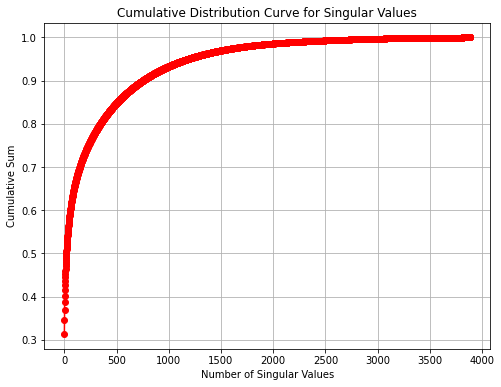

In [114]:
# Plot cumulative distribution curve
plt.figure(figsize=(8, 6))
cumulative_sum = np.cumsum(s)
plt.plot(cumulative_sum / np.sum(s), 'ro-')
plt.title('Cumulative Distribution Curve for Singular Values')
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Sum')
plt.grid(True)
plt.show()

##### Question 5
Calculate the compression ratio and plot with respect to singular values.

Compression ratios with different values of 'r': 
 [0.0009003049903469999, 0.0022507624758675, 0.004501524951735, 0.011253812379337499, 0.022507624758674998, 0.045015249517349996, 0.22507624758675]


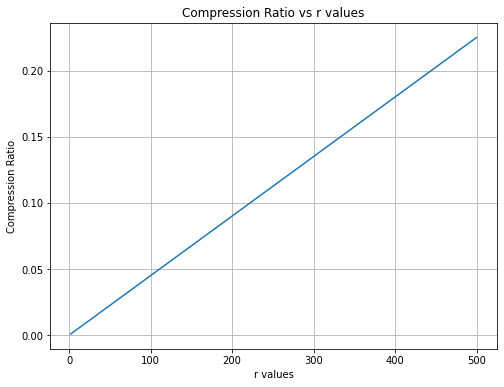

In [73]:
# Compression ratio
original_size = gray_img.size
compression_ratios = [memory_req/original_size for memory_req in memory_space]
print("Compression ratios with different values of 'r': \n", compression_ratios)

plt.figure(figsize=(8, 6))
plt.plot(r_values, compression_ratios)
plt.ylabel('Compression Ratio')
plt.xlabel('r values')
plt.grid(True)
plt.title('Compression Ratio vs r values')
plt.show()


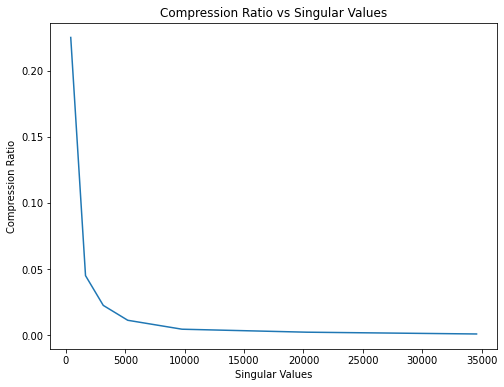

In [82]:
# Plotting compression ratio vs singular values
singular_valuess = [ s[r] for r in r_values]
plt.figure(figsize=(8, 6))
plt.plot(singular_valuess, compression_ratios)
plt.ylabel('Compression Ratio')
plt.xlabel('Singular Values')
plt.title('Compression Ratio vs Singular Values')
plt.show()

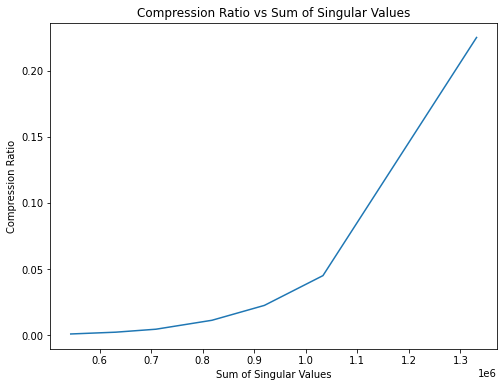

In [81]:
# Plotting compression ratio vs sum of singular values
singular_valuess = [ np.sum(s[:r]) for r in r_values]
plt.figure(figsize=(8, 6))
plt.plot(singular_valuess, compression_ratios)
plt.ylabel('Compression Ratio')
plt.xlabel('Sum of Singular Values')
plt.title('Compression Ratio vs Sum of Singular Values')
plt.show()

##### Question 6
Plot the Singular Values Plot (Semilogarithmic Scale) between Number of singular values and Singular values.

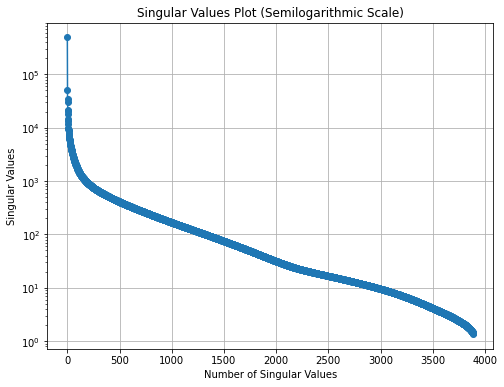

In [116]:
# Singular Values Plot (Semilogarithmic Scale)
plt.figure(figsize=(8, 6))
plt.semilogy(range(len(s)), s, marker='o', linestyle='-')
plt.title('Singular Values Plot (Semilogarithmic Scale)')
plt.xlabel('Number of Singular Values')
plt.ylabel('Singular Values')
plt.grid(True)
plt.show()


##### Question 7
Repeat Q. 2 for the original RGB image. Show three channels of RGB image along with the original images

In [84]:
image.shape

(3888, 5184, 3)

In [94]:
R = image[..., 2]
G = image[..., 1]
B = image[..., 0]
R_compressed_images, _, _, _ = svd_image_compression(R, r_values)
G_compressed_images, _, _, _ = svd_image_compression(G, r_values)
B_compressed_images, _, _, _ = svd_image_compression(B, r_values)

In [109]:
compressed_images = []
for i in range(len(r_values)):
    print(f'Processing {i+1}/{len(r_values)}')
    compressed_image = np.stack([R_compressed_images[i], G_compressed_images[i], B_compressed_images[i]], axis=2).astype(np.uint8)
    compressed_images.append(compressed_image)

Processing 1/7
Processing 2/7
Processing 3/7
Processing 4/7
Processing 5/7
Processing 6/7
Processing 7/7


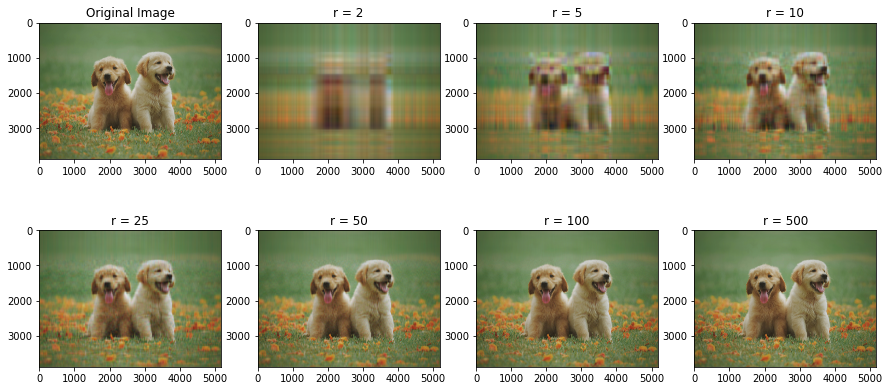

In [111]:
# Plotting the compressed images
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
ax = axes.ravel()
ax[0].imshow(image[...,::-1])
ax[0].set_title('Original Image')
for i in range(1, 8):
    ax[i].imshow(compressed_images[i-1])
    ax[i].set_title('r = %d' % r_values[i-1])
plt.show()

We can see that the image quality increases with the increase in the number of singular values.

### The End